#Importing Python Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the DataSet

In [ ]:
data = pd.read_csv('/content/drive/Othercomputers/PDS Assignment 1/16345452/ASSIGNMENT3/DATA/DIABETES_RAW_DATA.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


#checking for the NULL values in the dataset(Data Preprocessing)

In [ ]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.
(5 points)

Population Mean Glucose: 120.89
Population Highest Glucose: 199

Sample Mean Glucose: 116.64
Sample Highest Glucose: 183


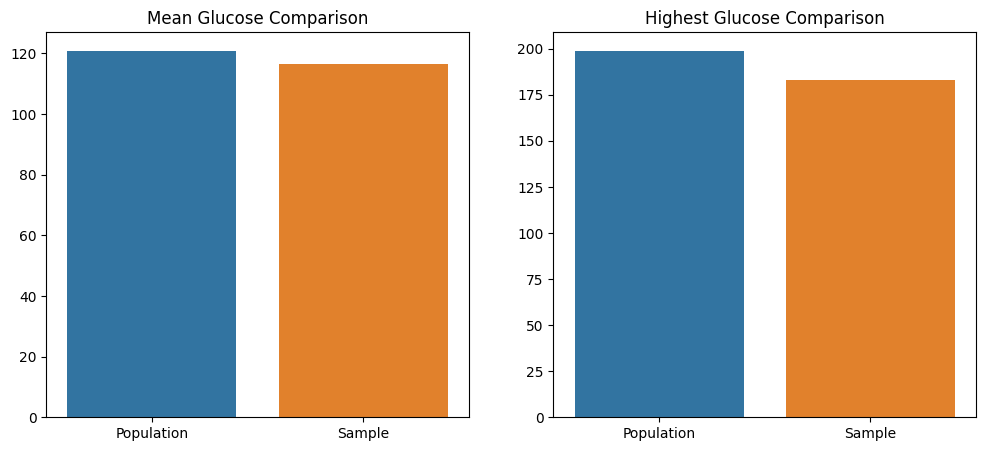

In [ ]:
# Settting seed for reproducibility
np.random.seed(42)

# Taking a random sample of 25 observations
sample_data = data.sample(25)

# Calculating mean and highest Glucose values for both population and sample
population_mean_glucose = data['Glucose'].mean()
population_highest_glucose = data['Glucose'].max()

sample_mean_glucose = sample_data['Glucose'].mean()
sample_highest_glucose = sample_data['Glucose'].max()

# Displaying population and sample statistics
print(f"Population Mean Glucose: {population_mean_glucose:.2f}")
print(f"Population Highest Glucose: {population_highest_glucose}")

print(f"\nSample Mean Glucose: {sample_mean_glucose:.2f}")
print(f"Sample Highest Glucose: {sample_highest_glucose}")

# Comparing statistics using charts
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Population vs Sample Mean Glucose
sns.barplot(x=['Population', 'Sample'], y=[population_mean_glucose, sample_mean_glucose], ax=axes[0])
axes[0].set_title('Mean Glucose Comparison')

# Population vs Sample Highest Glucose
sns.barplot(x=['Population', 'Sample'], y=[population_highest_glucose, sample_highest_glucose], ax=axes[1])
axes[1].set_title('Highest Glucose Comparison')

plt.show()

#b) Find the 98th percentile of BMI of your sample and the population and compare the results using charts.
(5 points)

Population 98th Percentile BMI: 47.53
Sample 98th Percentile BMI: 40.25


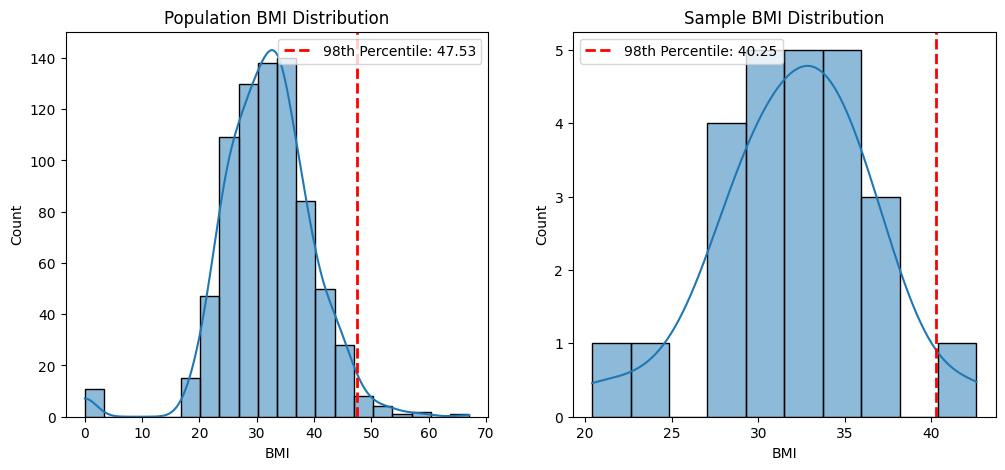

In [ ]:

# Calculating the 98th percentile of BMI for both population and sample
population_98th_percentile_bmi = np.percentile(data['BMI'], 98)
sample_98th_percentile_bmi = np.percentile(sample_data['BMI'], 98)

# Displaing population and sample statistics
print(f"Population 98th Percentile BMI: {population_98th_percentile_bmi:.2f}")
print(f"Sample 98th Percentile BMI: {sample_98th_percentile_bmi:.2f}")

# Comparing 98th percentile using charts
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Population BMI Distribution
sns.histplot(data['BMI'], bins=20, kde=True, ax=axes[0])
axes[0].axvline(population_98th_percentile_bmi, color='r', linestyle='dashed', linewidth=2, label=f'98th Percentile: {population_98th_percentile_bmi:.2f}')
axes[0].set_title('Population BMI Distribution')
axes[0].legend()

# Sample BMI Distribution
sns.histplot(sample_data['BMI'], bins=10, kde=True, ax=axes[1])
axes[1].axvline(sample_98th_percentile_bmi, color='r', linestyle='dashed', linewidth=2, label=f'98th Percentile: {sample_98th_percentile_bmi:.2f}')
axes[1].set_title('Sample BMI Distribution')
axes[1].legend()

plt.show()


#c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings.
(10 points)

Population Mean Blood Pressure: 69.11
Population Standard Deviation Blood Pressure: 19.36
Population 95th Percentile Blood Pressure: 90.0

Average Bootstrap Sample Statistics:
Average Mean: 69.18
Average Standard Deviation: 19.02
Average 95th Percentile: 91.12


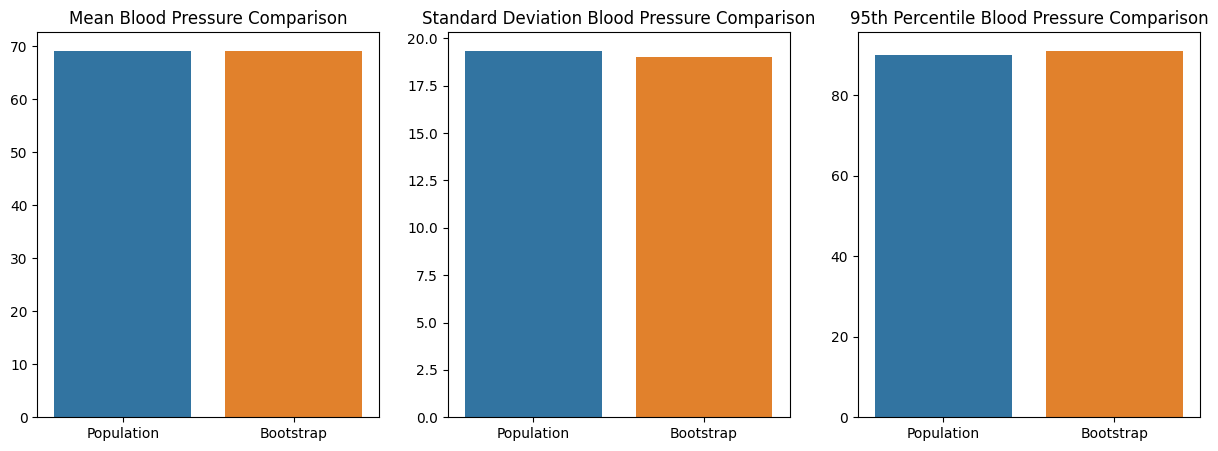

In [ ]:
# bootstrap samples and sample size
num_bootstrap_samples = 500
sample_size = 150

# Performing bootstrap resampling for BloodPressure
bootstrap_samples = [np.random.choice(data['BloodPressure'], size=sample_size, replace=True) for _ in range(num_bootstrap_samples)]

# Calculating statistics for the population
population_mean_bp = data['BloodPressure'].mean()
population_std_dev_bp = data['BloodPressure'].std()
population_percentile_bp = np.percentile(data['BloodPressure'], 95)  # Using 95th percentile for illustration

# Calculating statistics for bootstrap samples
bootstrap_means = [np.mean(sample) for sample in bootstrap_samples]
bootstrap_std_devs = [np.std(sample) for sample in bootstrap_samples]
bootstrap_percentiles = [np.percentile(sample, 95) for sample in bootstrap_samples]  # Using 95th percentile for illustration

# Displaying population statistics
print(f"Population Mean Blood Pressure: {population_mean_bp:.2f}")
print(f"Population Standard Deviation Blood Pressure: {population_std_dev_bp:.2f}")
print(f"Population 95th Percentile Blood Pressure: {population_percentile_bp}")

# Displaying average bootstrap sample statistics
print("\nAverage Bootstrap Sample Statistics:")
print(f"Average Mean: {np.mean(bootstrap_means):.2f}")
print(f"Average Standard Deviation: {np.mean(bootstrap_std_devs):.2f}")
print(f"Average 95th Percentile: {np.mean(bootstrap_percentiles):.2f}")

# Comparing statistics using charts
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Population vs Bootstrap Mean Blood Pressure
sns.barplot(x=['Population', 'Bootstrap'], y=[population_mean_bp, np.mean(bootstrap_means)], ax=axes[0])
axes[0].set_title('Mean Blood Pressure Comparison')

# Population vs Bootstrap Standard Deviation Blood Pressure
sns.barplot(x=['Population', 'Bootstrap'], y=[population_std_dev_bp, np.mean(bootstrap_std_devs)], ax=axes[1])
axes[1].set_title('Standard Deviation Blood Pressure Comparison')

# Population vs Bootstrap 95th Percentile Blood Pressure
sns.barplot(x=['Population', 'Bootstrap'], y=[population_percentile_bp, np.mean(bootstrap_percentiles)], ax=axes[2])
axes[2].set_title('95th Percentile Blood Pressure Comparison')

plt.show()
